Son necesarias las siguientes librerías:
 - NumPy
 - Matplotlib
 - Pandas
 - Scikit-learn



# Importamos las librerías necesarias (excepto Scikit-learn)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Cargamos los datos
Están en un csv al que accedemos mediante una URL.


In [3]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"


## Tratamos de entender los datos

### `FuelConsumption.csv`:
Vamos a usar un dataset llamado FuelConsumption.
Contiene registros por modelo de coche sobre el consumo de combustible y estimaciones de emisiones de dióxido de carbono para vehículos destinados a la venta minorista en Canadá.

[Fuente del Dataset](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64).

Contiene las siguientes variables:

- **MODEL YEAR** ej. 2014
- **MAKE** ej. VOLVO
- **MODEL** ej. S60 AWD
- **VEHICLE CLASS** ej. COMPACT
- **ENGINE SIZE** ej. 3.0
- **CYLINDERS** ej. 6
- **TRANSMISSION** ej. AS6
- **FUEL TYPE** ej. Z
- **FUEL CONSUMPTION in CITY(L/100 km)** ej. 13.2
- **FUEL CONSUMPTION in HWY (L/100 km)** ej. 9.5
- **FUEL CONSUMPTION COMBINED (L/100 km)** ej. 11.5
- **FUEL CONSUMPTION COMBINED MPG (MPG)** ej. 25
- **CO2 EMISSIONS (g/km)** ej. 182


Nuestra tarea es crear un modelo de regresión múltiple usando una de las características para predecir su impacto en las emisiones de CO2.



<h2 id="reading_data">Cargamos los datos</h2>


In [4]:
# Leemos el csv y lo guardamos en la variable df
df=pd.read_csv(url)

# Comprobamos que se ha cargado bien. En este caso usamos sample que nos elegirá 5 registros aleatorios.
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
349,2014,FORD,E350 WAGON,VAN - PASSENGER,6.8,10,A5,X,23.9,17.8,21.2,13,488
149,2014,BUICK,REGAL,MID-SIZE,2.0,4,AS6,Z,11.5,7.9,9.9,29,228
182,2014,CADILLAC,ESCALADE ESV AWD,SUV - STANDARD,6.2,8,A6,E,25.7,17.8,22.1,13,354
936,2014,SCION,xD,SUBCOMPACT,1.8,4,A4,X,8.8,7.1,8.0,35,184
758,2014,MERCEDES-BENZ,GL 550 4MATIC,SUV - STANDARD,4.7,8,AS7,Z,17.6,13.1,15.6,18,359


### Explorar los datos
Vamos a revisar algunas variables estadísticas.
Con describe tendremos un resumen de:
- Count: número de registros
- Mean: media
- Std: Desviación típica
- Min: Valor mínimo
- 25%: Primer cuartil
- 50%: Mediana o segundo cuartil
- 75%: Tercer cuartil
- Max: Valor máximo



In [5]:
# Usamos describe para conocer los estadísticos
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Observa que algunas de las variables no están incluidas en la descripción. Esto se debe a que no son numéricas. En la práctica, analizarías estas características si fuera necesario para mejorar la precisión de tu modelo. Para ahorrar tiempo, puedes omitir este paso.

También observa que la variable MODELYEAR es la misma para todos los autos, por lo que puedes eliminarla en esta ilustración del modelo.


In [6]:

# Eliminamos las columnas categóricas y cualquier columna innecesaria (MODELYEAR)
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',],axis=1)

Ahora que has eliminado algunas características, observa las relaciones entre las características restantes.

Vamos a realizar una matriz de correlación. Muestra las correlaciones entre pares de todas las características e indica el nivel de independencia entre ellas.

También indica lo predictiva que es cada característica.
- Los valores van de -1 a 1:
 - 1 indica una correlación positiva perfecta,
 - -1 una correlación negativa perfecta,
 - 0 indica que no hay correlación.
- Es útil para identificar variables redundantes o muy relacionadas, lo que ayuda a seleccionar las mejores características para el modelo.

Debes eliminar cualquier dependencia o correlación fuerte entre características, seleccionando la mejor de cada grupo de características que esten correlacionadas.


In [7]:

# Calcula la matriz de correlación entre todas las columnas numéricas del DataFrame.
df.corr()


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000



Observa la fila inferior, que muestra la correlación entre cada variable y el objetivo, 'CO2EMISSIONS'. Cada una de estas variables presenta un nivel de correlación bastante alto, todas superando el 85 % en magnitud. Por lo tanto, todas estas características son buenas candidatas.

A continuación, examina las correlaciones entre pares de variables. 'ENGINESIZE' y 'CYLINDERS' están altamente correlacionadas, pero 'ENGINESIZE' tiene una mayor correlación con el objetivo, así que podemos eliminar 'CYLINDERS'.

De manera similar, las cuatro variables relacionadas con el consumo de combustible están altamente correlacionadas entre sí. Como 'FUELCONSUMPTION_COMB_MPG' es la más correlacionada con el objetivo, puedes eliminar las demás: 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY' y 'FUELCONSUMPTION_COMB'.

Observa que 'FUELCONSUMPTION_COMB' y 'FUELCONSUMPTION_COMB_MPG' no están perfectamente correlacionadas. Sin embargo, deberían estarlo, ya que miden la misma propiedad en unidades diferentes. En la práctica, deberías investigar por qué ocurre esto. Podrías descubrir que parte o la totalidad de los datos no son utilizables tal como están.


In [8]:
# Eliminamos las columnas que tienen correlación entre sí
df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',],axis=1)

In [9]:
# Comprobamos nuestro dataframe
df.head(9)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244
5,3.5,28,230
6,3.5,28,232
7,3.7,25,255
8,3.7,24,267


Para ayudarte a seleccionar características predictivas que no sean redundantes, considera la siguiente matriz de dispersión, que muestra los diagramas de dispersión para cada par de características de entrada. La diagonal de la matriz muestra el histograma de cada característica.


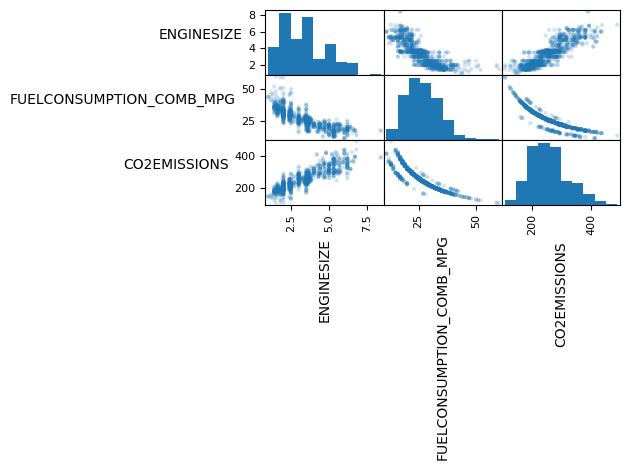

In [10]:

# Genera una matriz de dispersión (scatter matrix) para visualizar las relaciones entre todas las variables numéricas del DataFrame.
# El parámetro alpha=0.2 ajusta la transparencia de los puntos para facilitar la visualización en áreas densas.
axes = pd.plotting.scatter_matrix(df, alpha=0.2)


# Se necesita rotar las etiquetas de los ejes para que sean legibles.
for ax in axes.flatten():
    # Rota las etiquetas del eje X 90 grados (vertical).
    ax.xaxis.label.set_rotation(90)
    # Mantiene las etiquetas del eje Y horizontales.
    ax.yaxis.label.set_rotation(0)
    # Alinea las etiquetas del eje Y a la derecha.
    ax.yaxis.label.set_ha('right')

# Ajusta automáticamente el diseño para que los gráficos no se superpongan.
plt.tight_layout()


# Ajusta el espacio entre subgráficos horizontal y vertical a cero para que estén más compactos.
plt.gcf().subplots_adjust(wspace=0, hspace=0)

# Muestra la matriz de dispersión en pantalla.
plt.show()



Como puedes ver, la relación entre 'FUELCONSUMPTION_COMB_MPG' y 'CO2EMISSIONS' no es lineal. Además, se pueden distinguir claramente tres curvas diferentes. Esto sugiere explorar las variables categóricas para ver si pueden explicar estas diferencias.

Respecto a la no linealidad, por ahora, simplemente considera mediante el modelado si el consumo de combustible explica parte de la variación en el objetivo tal como está.


### Extraer las características de entrada y las etiquetas del conjunto de datos
Extrae las columnas necesarias y convierte los DataFrames resultantes en arrays de NumPy.


In [11]:

# Extrae las dos primeras columnas del DataFrame (tamaño del motor y consumo de combustible) como características de entrada (X)
# y las convierte en un arreglo de NumPy.
X = df.iloc[:,[0,1]].to_numpy()


# Extrae la tercera columna del DataFrame (CO2 emissions) como etiquetas (y)
# y también la convierte en un arreglo de NumPy.
y = df.iloc[:,[2]].to_numpy()

### Preprocesa las variables seleccionadas


Debes estandarizar tus características de entrada para que el modelo no favorezca alguna característica debido a su magnitud sin que nos demos cuenta.

La forma típica de hacerlo es restar la media y dividir por la desviación estándar. Scikit-learn puede hacer esto por ti.


In [12]:

# Importa el módulo de preprocesamiento de scikit-learn, que contiene herramientas para escalar y transformar datos.
from sklearn import preprocessing

# Crea un objeto StandardScaler, que se encargará de estandarizar los datos.
# Este método transforma cada característica para que tenga media 0 y desviación estándar 1.
std_scaler = preprocessing.StandardScaler()

# Aplica la estandarización a las características de entrada X.
# fit_transform calcula la media y desviación estándar de X, y luego transforma los datos.
X_std = std_scaler.fit_transform(X)


En la práctica, si deseas evaluar correctamente tu modelo, definitivamente no deberías aplicar este tipo de operaciones al conjunto de datos completo, sino por separado al conjunto de entrenamiento y al de prueba. De lo contrario, podemos causar sobreajuste o una evaluación poco realista (los resultados parecen mejores de lo que son).

Debes aplicar las transformaciones solo a los datos de entrenamiento y luego usar esos mismos parámetros (como la media y desviación estándar) para transformar los datos de prueba.

Por ejemplo, si estandarizas con StandardScaler, debes hacer esto:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  # Aprende y transforma

X_test_scaled = scaler.transform(X_test)        # Solo transforma usando lo aprendido

Existen otros detalles técnicos que también hay que tener en cuenta, pero de momento, lo haremos como está.

In [13]:
# Vamos a convertir el arreglo estandarizado en un dataframe
# Le vamos a pedir con describe que nos de los estadísticos básicos
# Con round(2) pedimos que los redondee
pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


Como puedes ver, una variable estandarizada tiene una media de cero y una desviación estándar de uno.


### Crear conjuntos de datos de entrenamiento y prueba

Divide aleatoriamente tus datos en conjuntos de entrenamiento y prueba, utilizando el 80 % del conjunto de datos para el entrenamiento y reservando el 20 % restante para la prueba.


In [14]:
# Importa la función train_test_split desde el módulo model_selection de scikit-learn.
# Esta función permite dividir los datos en conjuntos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split

# Divide los datos estandarizados (X_std) y las etiquetas (y) en dos conjuntos:
# - 80% para entrenamiento (X_train, y_train)
# - 20% para prueba (X_test, y_test)
# El parámetro random_state=42 asegura que la división sea reproducible (es decir, siempre igual si se vuelve a ejecutar).
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)


### Construir un modelo de regresión lineal múltiple

Los modelos de regresión lineal múltiple y simple pueden implementarse exactamente con las mismas herramientas de scikit-learn.


In [25]:

# Importa el módulo de regresión lineal desde scikit-learn.
from sklearn import linear_model

# Crea un objeto del modelo de regresión lineal.
# Este objeto se usará para entrenar el modelo con los datos de entrenamiento.
regressor = linear_model.LinearRegression()

# Entrena el modelo usando los datos de entrenamiento (X_train e y_train).
# El modelo aprenderá los coeficientes que mejor se ajustan a los datos.
regressor.fit(X_train, y_train)



# Extrae los coeficientes (pendientes) del modelo entrenado.
coef_ = regressor.coef_

# Extrae el término de intersección (bias o constante) del modelo.
intercept_ = regressor.intercept_

# Imprime los coeficientes que indican la influencia de cada variable independiente.
print('Coeficientes: ', coef_)

# Imprime la intersección, que representa el valor de salida cuando todas las entradas son cero.
print('Intersección: ', intercept_)


Coeficientes:  [[ 25.27339614 -37.4381472 ]]
Intersección:  [256.29072488]


Los coeficientes y el parámetro de intersección definen el hiperplano de mejor ajuste para los datos. Como solo hay dos variables, y por lo tanto dos parámetros, el hiperplano es un plano.

Cuando estandarizas las características de entrada (por ejemplo, tamaño del motor, consumo de combustible), estás cambiando sus valores para que:

- La media sea 0
- La desviación estándar sea 1

Esto ayuda al modelo a entrenarse mejor, pero los coeficientes que aprende (los valores de θ) están en ese espacio transformado, no en el original.

Puedes transformar los parámetros del modelo de nuevo al espacio original antes de la estandarización. Esto te dará una idea más clara de lo que significan en términos de tus características de entrada originales.

Estos números (coeficientes e intersección) no se refieren directamente al tamaño de motor o el consumo de combustible, sino a las versiones estandarizadas de esas variables. Por eso, si quieres interpretar el modelo en términos reales, necesitas reconvertir esos coeficientes al espacio original.

In [26]:

# Obtener los parámetros de media y desviación estándar del objeto StandardScaler
means_ = std_scaler.mean_  # Media de cada característica antes de la estandarización
std_devs_ = np.sqrt(std_scaler.var_)  # Desviación estándar de cada característica

# Los parámetros de mínimos cuadrados (regresión lineal) pueden calcularse en el espacio original (sin estandarizar) como:
coef_original = coef_ / std_devs_  # Ajuste de los coeficientes para volver al espacio original
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_)  # Ajuste del término independiente

# Mostrar los coeficientes y el término independiente en el espacio original
print('Coeficientes: ', coef_original)
print('Intersección: ', intercept_original)


Coeficientes:  [[17.8581369  -5.01502179]]
Intersección:  [329.1363967]


Cuando el tamaño del motor (ENGINESIZE) y el consumo de combustible (FUELCONSUMPTION_COMB_MPG) son ambos cero, lo lógico sería que las emisiones de CO₂ también fueran cero. Sin embargo, el modelo de regresión lineal ajustado muestra una intersección (intercepto) de 329 g/km, lo que significa que incluso con valores nulos en esas variables, el modelo predice emisiones de CO₂.

Esto indica que:

- La relación entre las variables independientes (como el tamaño del motor y el consumo de combustible) y la variable objetivo (emisiones de CO₂) no es completamente lineal.
- Es posible que haya valores atípicos (outliers) en los datos que estén afectando el ajuste del modelo.
- Algunas variables podrían tener una relación no lineal con las emisiones.
- También puede existir colinealidad entre las variables de entrada, lo que dificulta que el modelo identifique correctamente la influencia de cada una.

### Visualizar los resultados del modelo
Puedes evaluar si el modelo se ajusta bien a los datos de entrenamiento visualizando el plano sobre los datos. Esto te permitirá ver gráficamente la calidad del ajuste del modelo.


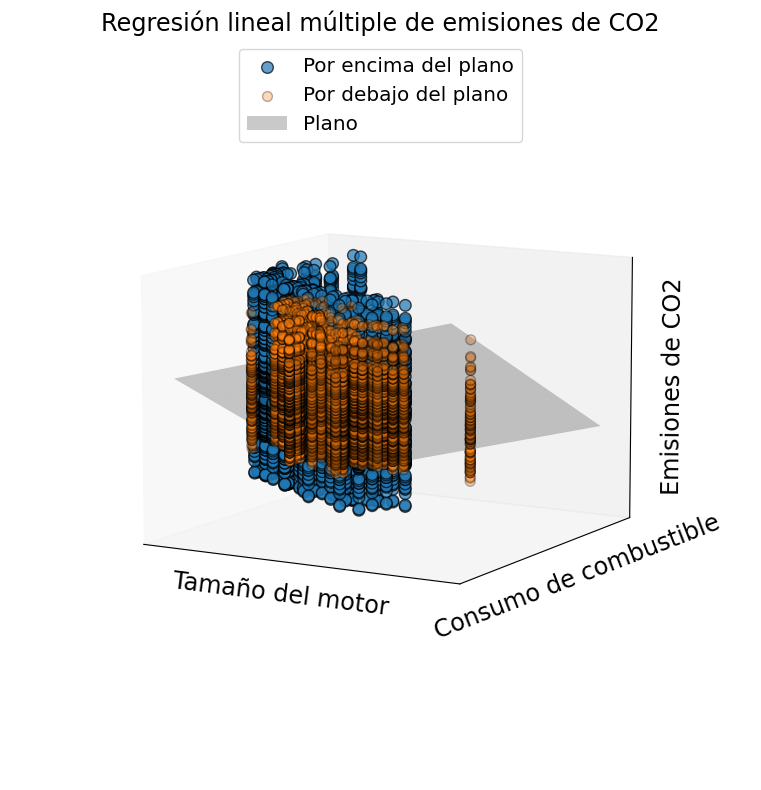

In [28]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt

# Asegurar que X1, X2 y y_test tengan formas compatibles para graficar en 3D
X1 = X_test[:, 0] if X_test.ndim > 1 else X_test  # Extraer la primera característica
X2 = X_test[:, 1] if X_test.ndim > 1 else np.zeros_like(X1)  # Extraer la segunda característica o crear un vector de ceros si no existe

# Crear una malla (grid) para graficar el plano de regresión
x1_surf, x2_surf = np.meshgrid(
    np.linspace(X1.min(), X1.max(), 100),  # Valores de X1 en el rango observado
    np.linspace(X2.min(), X2.max(), 100)   # Valores de X2 en el rango observado
)


# Calcular los valores de y sobre el plano de regresión usando los coeficientes del modelo
y_surf = intercept_ + coef_[0, 0] * x1_surf + coef_[0, 1] * x2_surf

# Predecir los valores de y usando el modelo entrenado para comparar con y_test
y_pred = regressor.predict(X_test.reshape(-1, 1)) if X_test.ndim == 1 else regressor.predict(X_test)



# Determinar qué puntos están por encima o por debajo del plano
above_plane = y_test >= y_pred
below_plane = y_test < y_pred
above_plane = above_plane[:, 0]  # Convertir a vector plano
below_plane = below_plane[:, 0]



# Crear la figura y el gráfico 3D
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos que están por encima del plano en un color
ax.scatter(X1[above_plane], X2[above_plane], y_test[above_plane],
           label="Por encima del plano", s=70, alpha=0.7, ec='k')

# Graficar los puntos que están por debajo del plano en otro color
ax.scatter(X1[below_plane], X2[below_plane], y_test[below_plane],
           label="Por debajo del plano", s=50, alpha=0.3, ec='k')


# Graficar el plano de regresión
ax.plot_surface(x1_surf, x2_surf, y_surf, color='k', alpha=0.21, label='Plano')

# Ajustar la vista y etiquetas del gráfico
ax.view_init(elev=10)  # Ángulo de elevación de la vista



ax.legend(fontsize='x-large', loc='upper center')  # Leyenda
ax.set_xticks([])  # Ocultar marcas del eje X
ax.set_yticks([])  # Ocultar marcas del eje Y
ax.set_zticks([])  # Ocultar marcas del eje Z
ax.set_box_aspect(None, zoom=0.75)  # Ajustar proporción del gráfico

# Etiquetas de los ejes
ax.set_xlabel('Tamaño del motor', fontsize='xx-large')
ax.set_ylabel('Consumo de combustible', fontsize='xx-large')
ax.set_zlabel('Emisiones de CO2', fontsize='xx-large')


# Título del gráfico
ax.set_title('Regresión lineal múltiple de emisiones de CO2', fontsize='xx-large')

# Ajustar el diseño del gráfico
plt.tight_layout()
plt.show()


En lugar de hacer una gráfica en 3D, que puede ser difícil de interpretar, puedes visualizar cortes verticales de esa gráfica tridimensional. Para ello, se puede representar cada variable por separado como una línea de mejor ajuste, utilizando los parámetros de regresión correspondientes.

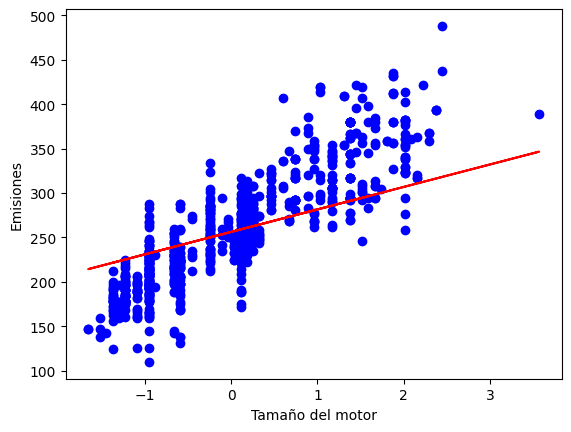

In [29]:

# Dibujar los datos de entrenamiento: tamaño del motor vs emisiones
plt.scatter(X_train[:, 0], y_train, color='blue')
# Se dibujan los puntos reales del conjunto de entrenamiento en color azul

# Dibujar la línea de mejor ajuste (regresión lineal)
plt.plot(X_train[:, 0], coef_[0, 0] * X_train[:, 0] + intercept_[0], '-r')
# Se dibuja la línea de regresión en rojo usando el coeficiente y el intercepto del modelo

# Etiquetas de los ejes
plt.xlabel("Tamaño del motor")  # Etiqueta del eje X: tamaño del motor
plt.ylabel("Emisiones")     # Etiqueta del eje Y: emisiones de CO₂

# Mostrar la gráfica
plt.show()


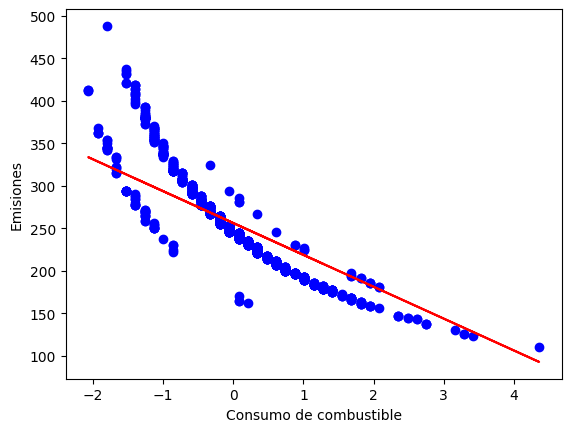

In [30]:

# Dibujar los datos de entrenamiento: consumo de combustible vs emisiones
plt.scatter(X_train[:, 1], y_train, color='blue')
# Se dibujan los puntos reales del conjunto de entrenamiento en color azul, usando la segunda variable (consumo de combustible)

# Dibujar la línea de mejor ajuste (regresión lineal)
plt.plot(X_train[:, 1], coef_[0, 1] * X_train[:, 1] + intercept_[0], '-r')
# Se dibuja la línea de regresión en rojo usando el coeficiente correspondiente al consumo de combustible y el intercepto

# Etiquetas de los ejes
plt.xlabel("Consumo de combustible")  # Etiqueta del eje X
plt.ylabel("Emisiones")               # Etiqueta del eje Y

# Mostrar la gráfica
plt.show()


Evidentemente, el resultado es muy deficiente, ya que el modelo está intentando ajustar un plano a una superficie que no es plana. Esto provoca que el ajuste no represente correctamente la relación entre las variables.


### Determina y muestra los parámetros de la línea de regresión lineal de mejor ajuste para las emisiones de CO₂ en función del tamaño del motor.


In [31]:

# Extraer la primera variable (tamaño del motor) del conjunto de entrenamiento
X_train_1 = X_train[:, 0]

# Crear un modelo de regresión lineal
regressor_1 = linear_model.LinearRegression()

# Entrenar el modelo usando solo la variable de tamaño del motor
regressor_1.fit(X_train_1.reshape(-1, 1), y_train)
# Se ajusta el modelo a los datos, convirtiendo X_train_1 en una matriz columna

# Obtener el coeficiente (pendiente) y el intercepto (ordenada al origen) del modelo ajustado
coef_1 = regressor_1.coef_
intercept_1 = regressor_1.intercept_



# Mostrar los parámetros del modelo
print('Coeficientes: ', coef_1)     # Muestra cuánto cambian las emisiones por unidad de tamaño del motor
print('Intersección: ', intercept_1)   # Muestra el valor estimado de emisiones cuando el tamaño del motor es cero


Coeficientes:  [[55.18408797]]
Intersección:  [256.77183014]


### Genera un diagrama de dispersión (scatterplot) que muestre las emisiones de CO₂ en función del tamaño del motor (ENGINESIZE) e incluye la línea de regresión de mejor ajuste basada en los datos de entrenamiento.


Text(0, 0.5, 'Emisiones')

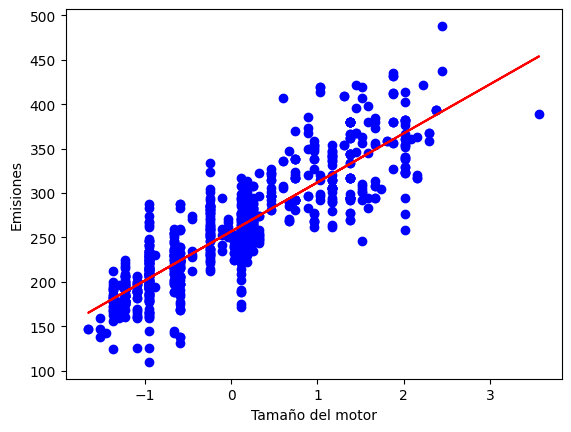

In [32]:

# Graficar los datos de entrenamiento: tamaño del motor vs emisiones
plt.scatter(X_train_1, y_train, color='blue')
# Se dibujan los puntos reales del conjunto de entrenamiento en color azul

# Graficar la línea de regresión lineal de mejor ajuste
plt.plot(X_train_1, coef_1[0] * X_train_1 + intercept_1, '-r')
# Se dibuja la línea de regresión en rojo usando el coeficiente y el intercepto obtenidos del modelo

# Etiquetar los ejes
plt.xlabel("Tamaño del motor")  # Etiqueta del eje X: tamaño del motor
plt.ylabel("Emisiones")     # Etiqueta del eje Y: emisiones de CO₂


Evidentemente, este modelo de regresión lineal simple ofrece un ajuste mucho mejor de las emisiones de CO₂ sobre los datos de entrenamiento que el modelo de regresión múltiple.
Veamos ahora cómo se comporta en los datos de prueba.

### Genera el mismo diagrama de dispersión y la línea de regresión de mejor ajuste, pero esta vez utilizando el conjunto de datos de prueba.
Reflexiona sobre cómo se compara el resultado en los datos de prueba con el obtenido en los datos de entrenamiento.


Text(0, 0.5, 'Emisiones de CO2')

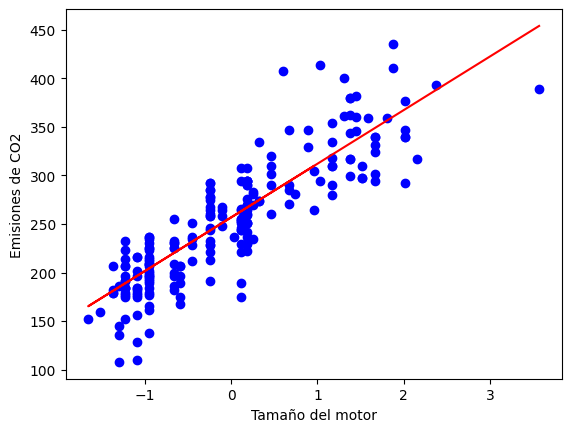

In [33]:

# Extraer la primera variable (tamaño del motor) del conjunto de prueba
X_test_1 = X_test[:, 0]

# Graficar los datos de prueba: tamaño del motor vs emisiones
plt.scatter(X_test_1, y_test, color='blue')
# Se dibujan los puntos reales del conjunto de prueba en color azul

# Graficar la línea de regresión obtenida del modelo entrenado
plt.plot(X_test_1, coef_1[0] * X_test_1 + intercept_1, '-r')
# Se dibuja la línea de regresión en rojo usando los parámetros obtenidos del modelo entrenado con los datos de entrenamiento

# Etiquetar los ejes
plt.xlabel("Tamaño del motor")      # Etiqueta del eje X: tamaño del motor
plt.ylabel("Emisiones de CO2")      # Etiqueta del eje Y: emisiones de CO₂


### Repite el mismo modelado, pero esta vez utilizando FUELCONSUMPTION_COMB_MPG como variable independiente.
Muestra los coeficientes del modelo, incluyendo la intersección.



In [36]:

# Extraer la segunda variable (consumo de combustible combinado en MPG) del conjunto de entrenamiento
X_train_2 = X_train[:, 1]

# Crear un modelo de regresión lineal
regressor_2 = linear_model.LinearRegression()

# Entrenar el modelo usando solo la variable de consumo de combustible
regressor_2.fit(X_train_2.reshape(-1, 1), y_train)
# Se ajusta el modelo a los datos, convirtiendo X_train_2 en una matriz columna

# Obtener el coeficiente (pendiente) y el intercepto (ordenada al origen) del modelo ajustado
coef_2 = regressor_2.coef_
intercept_2 = regressor_2.intercept_


# Mostrar los parámetros del modelo
print('Coeficientes: ', coef_2)     # Muestra cuánto cambian las emisiones por unidad de consumo de combustible
print('Intersección: ', intercept_2)   # Muestra el valor estimado de emisiones cuando el consumo es cero


Coeficientes:  [[-58.51827989]]
Intersección:  [256.09392179]


### Genera un diagrama de dispersión como el anterior, pero esta vez utilizando los datos de prueba.
Reflexiona sobre qué tan bien se ajusta el modelo y qué podrías hacer para mejorarlo.
Volveremos a analizar esto más adelante en el curso.


Text(0, 0.5, 'Emisiones de CO2')

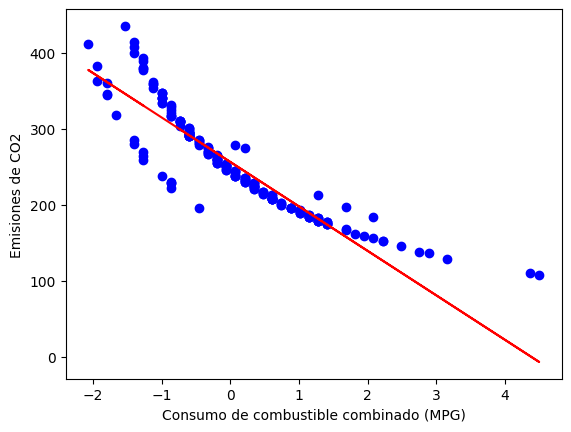

In [35]:

# Extraer la segunda variable (consumo de combustible) del conjunto de prueba
X_test_2 = X_test[:, 1]

# Graficar los datos de prueba: consumo de combustible vs emisiones
plt.scatter(X_test_2, y_test, color='blue')
# Se dibujan los puntos reales del conjunto de prueba en color azul

# Graficar la línea de regresión obtenida del modelo entrenado
plt.plot(X_test_2, coef_2[0] * X_test_2 + intercept_2, '-r')
# Se dibuja la línea de regresión en rojo usando los parámetros obtenidos del modelo entrenado con los datos de entrenamiento

# Etiquetar los ejes
plt.xlabel("Consumo de combustible combinado (MPG)")  # Etiqueta del eje X
plt.ylabel("Emisiones de CO2")                        # Etiqueta del eje Y
